# Cab Investment Firm Data Analysis
## Name: Hassan Faheem
## Week 2 & 3

### Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
cabData= pd.read_csv('Cab_Data.csv')
cityData =pd.read_csv('City.csv')
customerID=pd.read_csv('Customer_ID.csv')
transactionID=pd.read_csv('Transaction_ID.csv')

### Exploratory Data Analysis Of Cab Data



In [3]:
cabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
#Date of Travel Conversion

from datetime import datetime, timedelta

In [5]:
def to_format_date(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [6]:
cabData['Date of Travel']=cabData['Date of Travel'].apply(lambda x:to_format_date(x))

In [7]:
cabData=cabData.sort_values(by=['Date of Travel'])
cabData=cabData.reset_index(drop= True)


In [8]:
cabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840


In [9]:
cabData.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [10]:
round(cabData.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20


## Exploratory Data Analysis Of City Data

In [11]:
cityData.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [12]:
cityData.shape

(20, 3)

In [13]:
cityData.dtypes

City          object
Population    object
Users         object
dtype: object

In [14]:
#Converting Data Types
cityData['Population'] = [x.replace(',','') for x in cityData['Population']]
cityData['Users'] = [x.replace(',','') for x in cityData['Users']]

cityData['Population'] = cityData['Population'].astype(float)
cityData['Users'] = cityData['Users'].astype(float)

In [15]:
cityData.dtypes

City           object
Population    float64
Users         float64
dtype: object

## Exploratory Data Analysis Of Customer ID Data

In [16]:
customerID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
customerID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

## Exploratory Data Analysis Of Transaction ID Data

In [18]:
transactionID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [19]:
transactionID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

## Combining Data Sources

In [20]:
#Combining all the data from 4 data sources into one group

mainData = cabData.merge(transactionID, on= 'Transaction ID').merge(customerID, on ='Customer ID').merge(cityData, on = 'City')

In [21]:
mainData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0


In [22]:
mainData.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

In [23]:
#Fixing Data Types

mainData['Income (USD/Month)'] = mainData['Income (USD/Month)'].astype(float)
mainData['Population'] = mainData['Population'].astype(int)
mainData['Users'] = mainData['Users'].astype(int)
mainData.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int32
Users                          int32
dtype: object

### Analysis of Features using Visualizations

Text(0.5, 8.95999999999998, 'Km Travelled')

<Figure size 1224x648 with 0 Axes>

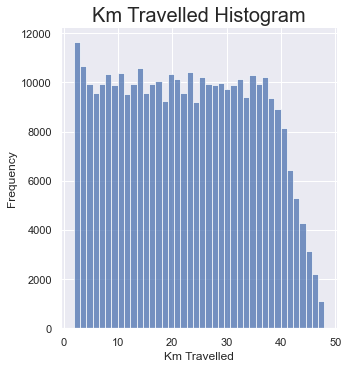

In [24]:
# Analysing KM Travelled 

plt.figure(figsize=(17,9))
ax=sns.displot(data=mainData, x="KM Travelled",bins=40)
plt.title('Km Travelled Histogram', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')


Text(0.5, 0, 'Price Charged')

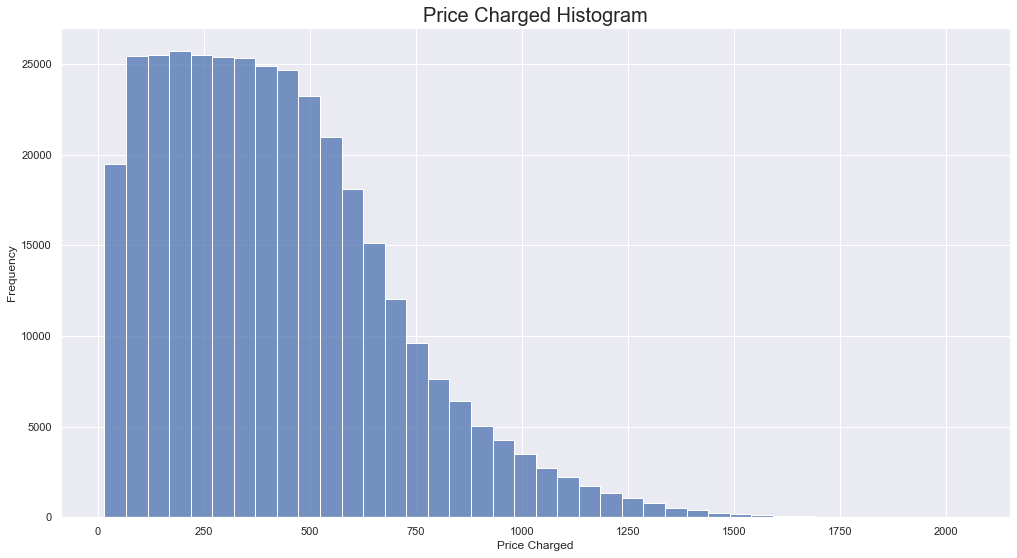

In [25]:
#Analysing Price Charged

plt.figure(figsize=(17,9))
sns.histplot(data=mainData, x="Price Charged",bins=40)
plt.title('Price Charged Histogram', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Cost of Trip')

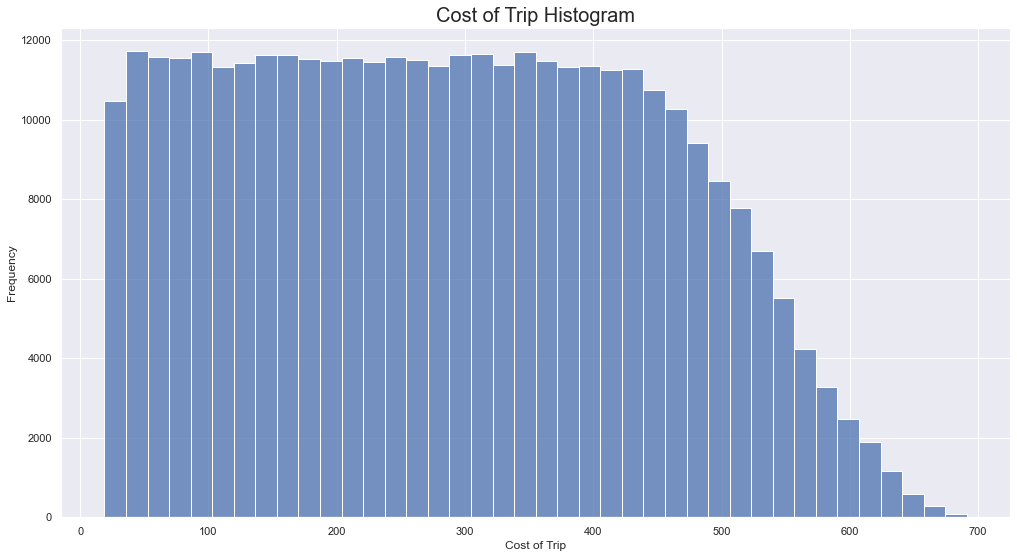

In [26]:
#Analysing Cost of Trip

plt.figure(figsize=(17,9))
sns.histplot(data= mainData,x="Cost of Trip",bins=40)
plt.title('Cost of Trip Histogram', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Gender')

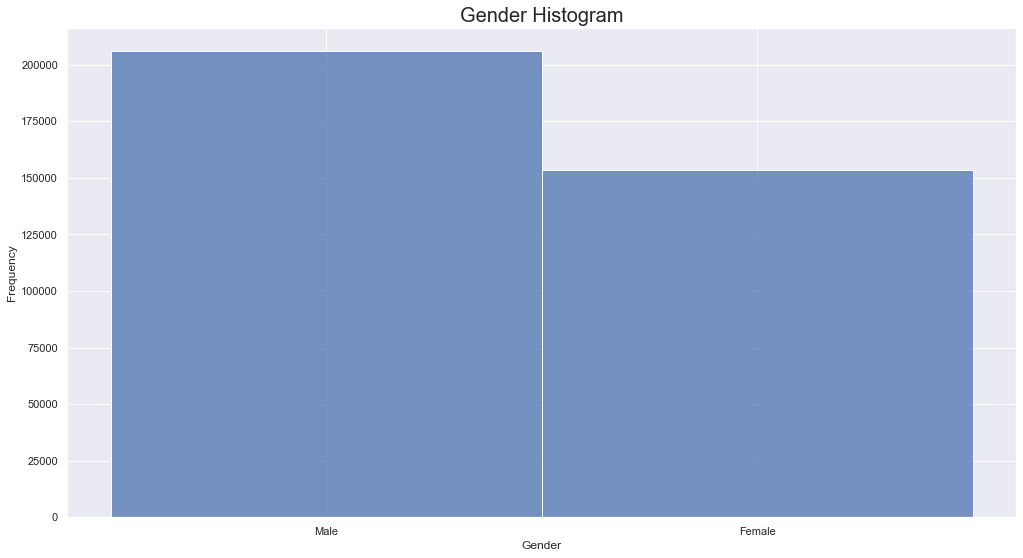

In [27]:
#Analying Gender

plt.figure(figsize=(17,9))
sns.histplot(data= mainData,x="Gender")
plt.title('Gender Histogram', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Gender')

Text(0.5, 0, 'Payment Mode')

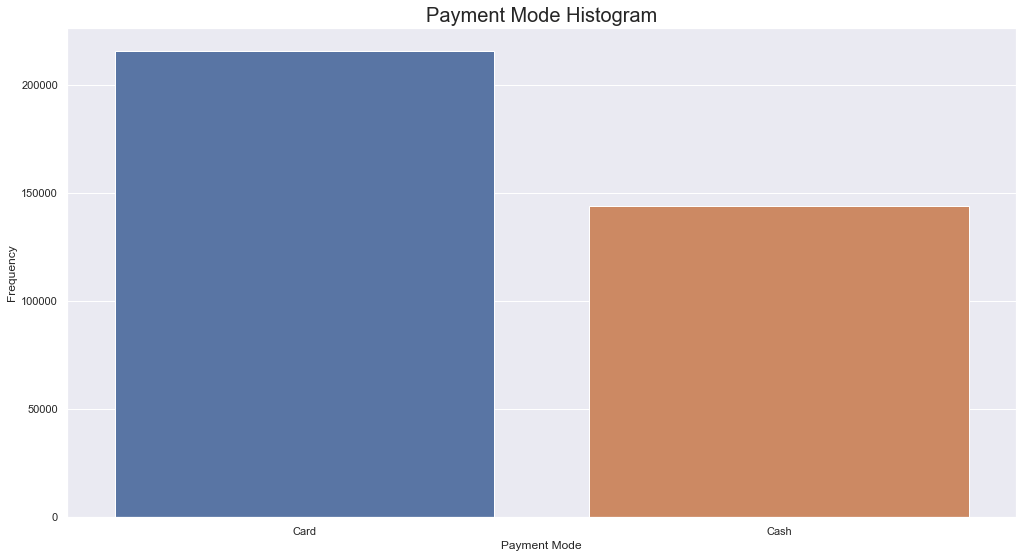

In [28]:
#Analysing Payment Mode

plt.figure(figsize=(17,9))
sns.countplot(data=mainData, x="Payment_Mode")
plt.title("Payment Mode Histogram", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

In [29]:
#Analysing the correlation between features

mainData.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


In [30]:
#Checking for any missing values

mainData.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

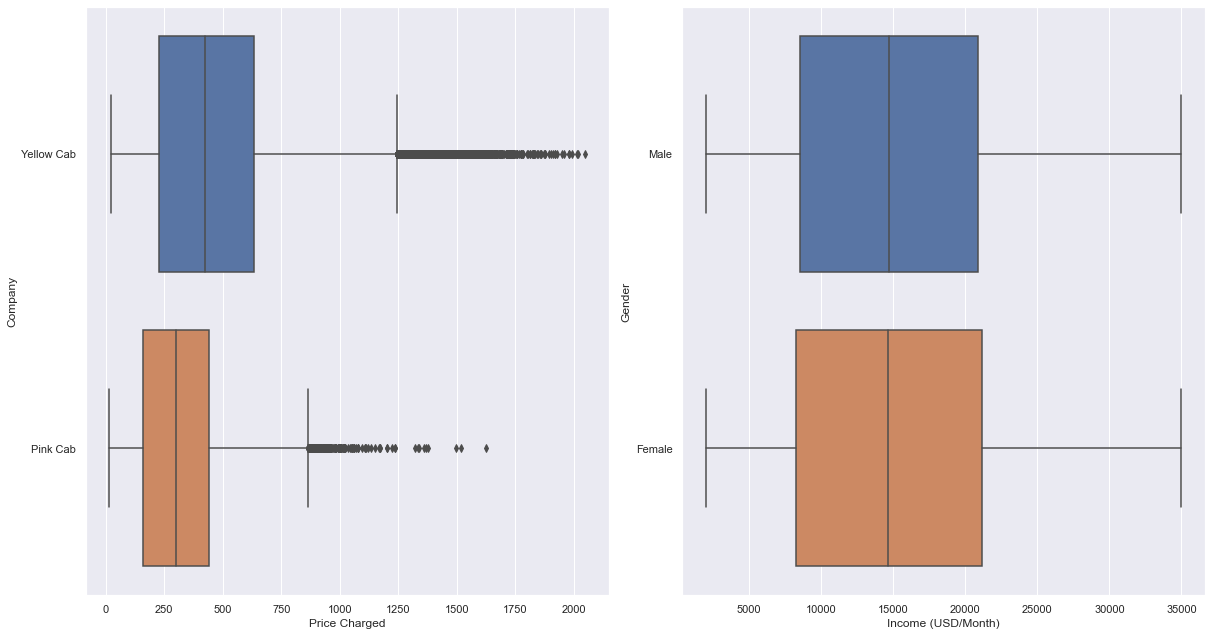

In [31]:
#Checking for outliers

plt.figure(figsize=(17,9))

plt.subplot(1,2,1)
sns.boxplot(data = mainData, y = 'Company', x = "Price Charged", dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = mainData, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

### Creating Time Series

In [32]:
#Initializing New Features

mainData['Year of Travel'] = mainData['Date of Travel'].dt.year
mainData['Month of Travel'] = mainData['Date of Travel'].dt.month
mainData['Day of Travel'] = mainData['Date of Travel'].dt.day
mainData['Profit'] = mainData['Price Charged'] -mainData['Cost of Trip']

In [33]:
mainData_ts=mainData.set_index('Date of Travel')

mainData_ts.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,2016,1,1,66.6760
2016-01-01,10001254,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.6032,13894,Card,Male,32,21898.0,1177609,27247,2016,1,1,821.4468
2016-01-01,10001242,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,14513,Card,Male,62,3892.0,1177609,27247,2016,1,1,418.6236
2016-01-01,10000885,Yellow Cab,NEW YORK NY,32.20,940.73,452.0880,1698,Card,Male,23,22120.0,8405837,302149,2016,1,1,488.6420
2016-01-01,10000961,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,85,Card,Male,19,19765.0,8405837,302149,2016,1,1,380.8472


### Comparison of Yellow & Pink Cab Comapnies

In [34]:
#Dataset of Yellow Cab Company

yellowCab= mainData[mainData.Company.isin(['Yellow Cab'])]
print(yellowCab.shape)
yellowCab.head()

(274681, 18)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,2016,1,1,66.6760
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606.0,418859,127001,2016,3,25,14.3688
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606.0,418859,127001,2017,4,16,18.4932
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606.0,418859,127001,2017,6,23,114.8280
6,10261473,2017-11-16,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,52536,Cash,Male,24,10606.0,418859,127001,2017,11,16,35.7320


In [35]:
#Dataset for Yellow Cab Company (Time series format)

yellowCab_ts= mainData_ts[mainData_ts.Company.isin(['Yellow Cab'])]
print(yellowCab_ts.shape)
yellowCab_ts.head()

(274681, 17)


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,2016,1,1,66.6760
2016-03-25,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606.0,418859,127001,2016,3,25,14.3688
2017-04-16,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606.0,418859,127001,2017,4,16,18.4932
2017-06-23,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606.0,418859,127001,2017,6,23,114.8280
2017-11-16,10261473,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,52536,Cash,Male,24,10606.0,418859,127001,2017,11,16,35.7320


In [36]:
#Dataset of Pink Cab Company

pinkCab= mainData[mainData.Company.isin(['Pink Cab'])]
print(pinkCab.shape)
pinkCab.head()

(84711, 18)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.621,52536,Cash,Male,24,10606.0,418859,127001,2016,11,8,25.709
5,10249981,2017-10-30,Pink Cab,WASHINGTON DC,28.00,424.20,280.000,52536,Card,Male,24,10606.0,418859,127001,2017,10,30,144.200
19,10242139,2017-10-19,Pink Cab,WASHINGTON DC,26.78,371.96,313.326,53683,Card,Male,26,9389.0,418859,127001,2017,10,19,58.634
29,10143658,2017-02-10,Pink Cab,WASHINGTON DC,42.55,504.03,489.325,53126,Cash,Male,24,3032.0,418859,127001,2017,2,10,14.705
63,10125156,2016-12-20,Pink Cab,WASHINGTON DC,10.00,151.06,104.000,51580,Card,Male,51,6115.0,418859,127001,2016,12,20,47.060


In [37]:
#Dataset for Pink Cab Company (Time series format)

pinkCab_ts= mainData_ts[mainData_ts.Company.isin(['Pink Cab'])]
print(pinkCab_ts.shape)
pinkCab_ts.head()

(84711, 17)


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-11-08,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.621,52536,Cash,Male,24,10606.0,418859,127001,2016,11,8,25.709
2017-10-30,10249981,Pink Cab,WASHINGTON DC,28.00,424.20,280.000,52536,Card,Male,24,10606.0,418859,127001,2017,10,30,144.200
2017-10-19,10242139,Pink Cab,WASHINGTON DC,26.78,371.96,313.326,53683,Card,Male,26,9389.0,418859,127001,2017,10,19,58.634
2017-02-10,10143658,Pink Cab,WASHINGTON DC,42.55,504.03,489.325,53126,Cash,Male,24,3032.0,418859,127001,2017,2,10,14.705
2016-12-20,10125156,Pink Cab,WASHINGTON DC,10.00,151.06,104.000,51580,Card,Male,51,6115.0,418859,127001,2016,12,20,47.060


In [38]:
q=mainData.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
q.head()

Profit
Company    Year of Travel              
Pink Cab   2016            1.739883e+06
           2017            2.015101e+06
           2018            1.552345e+06
Yellow Cab 2016            1.407389e+07
           2017            1.646427e+07

### Analysing Profit

In [39]:
#Analysing Annual Profits
#Pink profit yearly
#Yellow profit yearly

y=yellowCab_ts.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)
p=pinkCab_ts.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print("Yellow Company")
print(ypy)
print("Pink Company")
print(ppy)
y=yellowCab_ts.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pinkCab_ts.Profit.resample('m').sum()
ppm= pd.DataFrame(p)

Yellow Company
                      Profit
Date of Travel              
2016-12-31      1.407389e+07
2017-12-31      1.646427e+07
2018-12-31      1.348222e+07
Pink Company
                     Profit
Date of Travel             
2016-12-31      1739882.628
2017-12-31      2015100.657
2018-12-31      1552345.036


In [40]:
#Defining Feature for Profit based on Rides

ypy['RidesProfit']= ypy['Profit']/yellowCab['Date of Travel'].value_counts().resample('Y').sum()
ppy['RidesProfit']= ppy['Profit']/pinkCab['Date of Travel'].value_counts().resample('Y').sum()
ypm['RidesProfit']= ypm['Profit']/yellowCab['Date of Travel'].value_counts().resample('m').sum()
ppm['RidesProfit']= ppm['Profit']/pinkCab['Date of Travel'].value_counts().resample('m').sum()


In [41]:
#Defining Feature for Profit based on KM

ypy['KMProfit']= ypy['Profit']/yellowCab_ts['KM Travelled'].resample('Y').sum()
ppy['KMProfit']= ppy['Profit']/pinkCab_ts['KM Travelled'].resample('Y').sum()
ypm['KMProfit']= ypm['Profit']/yellowCab_ts['KM Travelled'].resample('m').sum()
ppm['KMProfit']= ppm['Profit']/pinkCab_ts['KM Travelled'].resample('m').sum()

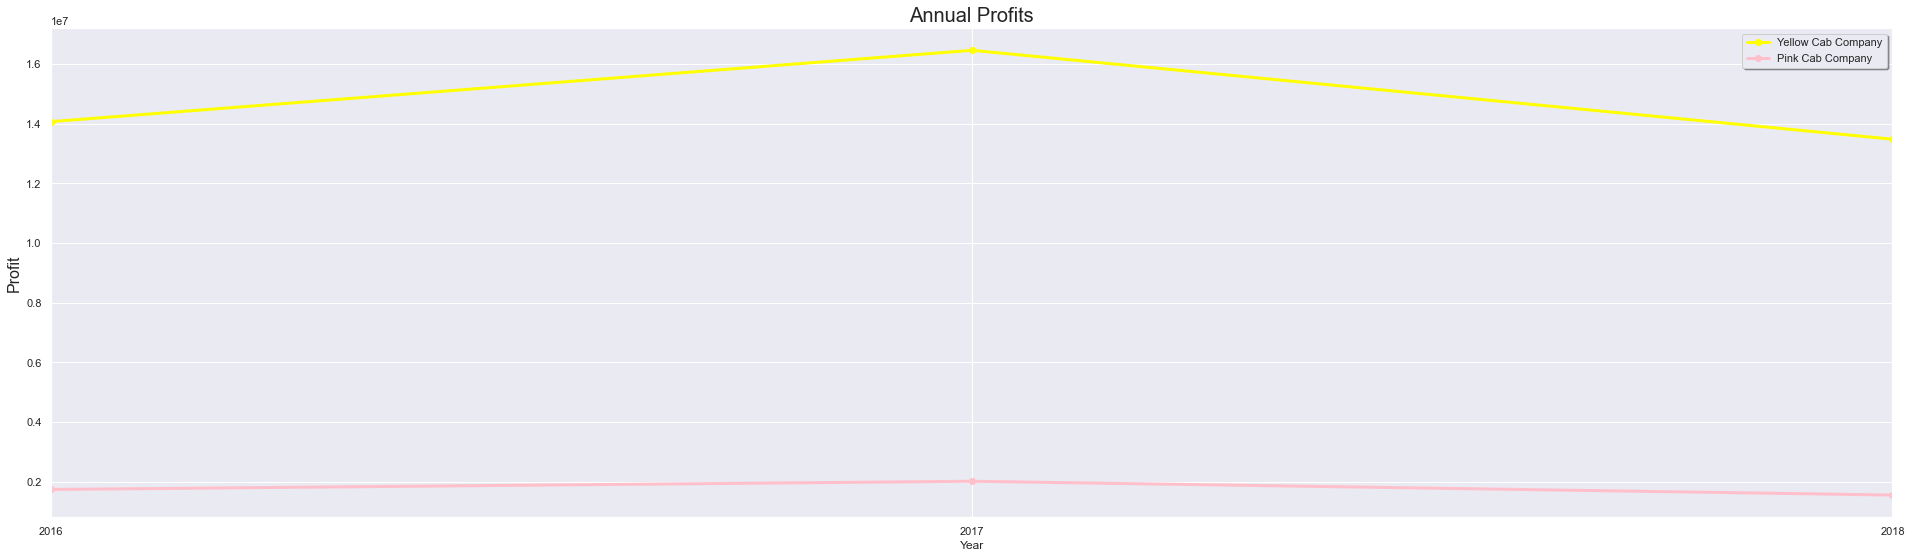

In [42]:
plt.figure(figsize=(33,9))

fig= yellowCab_ts.Profit.resample('Y').sum().plot.line(color = 'yellow',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pinkCab_ts.Profit.resample('Y').sum().plot.line(color = 'pink',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)

In [43]:
round(mainData.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


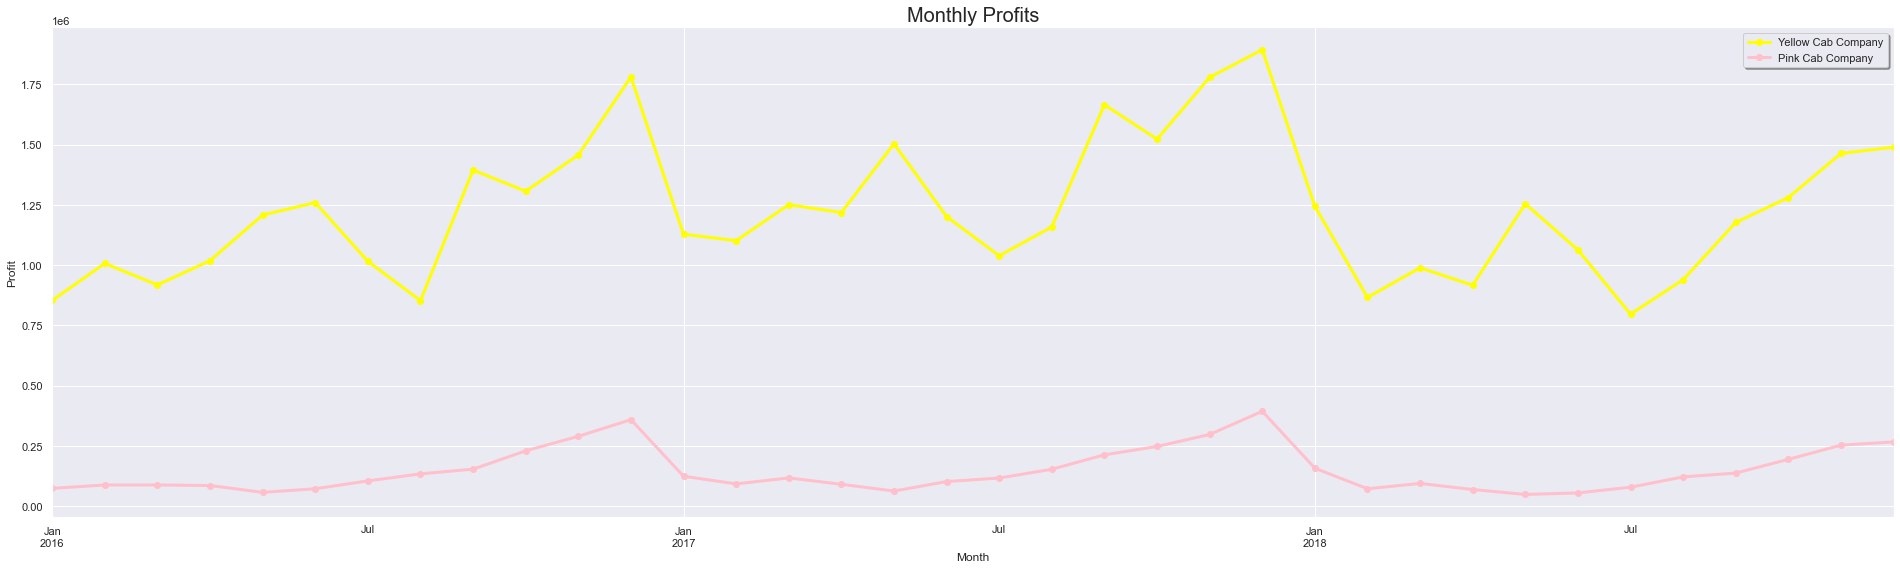

In [44]:
#Analysing Monthly Profits

plt.figure(figsize=(33,9))

fig= yellowCab_ts.Profit.resample('m').sum().plot.line(color = 'yellow',label='Yellow Cab Company',linewidth=3, marker ='o')
fig=pinkCab_ts.Profit.resample('m').sum().plot.line(color = 'pink',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

In [45]:
dpm=mainData.groupby(['Company','Month of Travel'])['Profit'].sum().to_frame('Profit')
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)

In [46]:
y=yellowCab_ts.Profit.resample('m').sum().to_frame('Profit')
p=pinkCab_ts.Profit.resample('m').sum().to_frame('Profit')

In [47]:
print("Monthly Profit")
print('Mean Monthly Proft for Yellow Cab Comapny: ', round(y.Profit.mean(),1))
print('Mean Monthly Proft for Pink Cab Comapny: ', round(p.Profit.mean(),1))

Monthly Profit
Mean Monthly Proft for Yellow Cab Comapny:  1222788.1
Mean Monthly Proft for Pink Cab Comapny:  147425.8


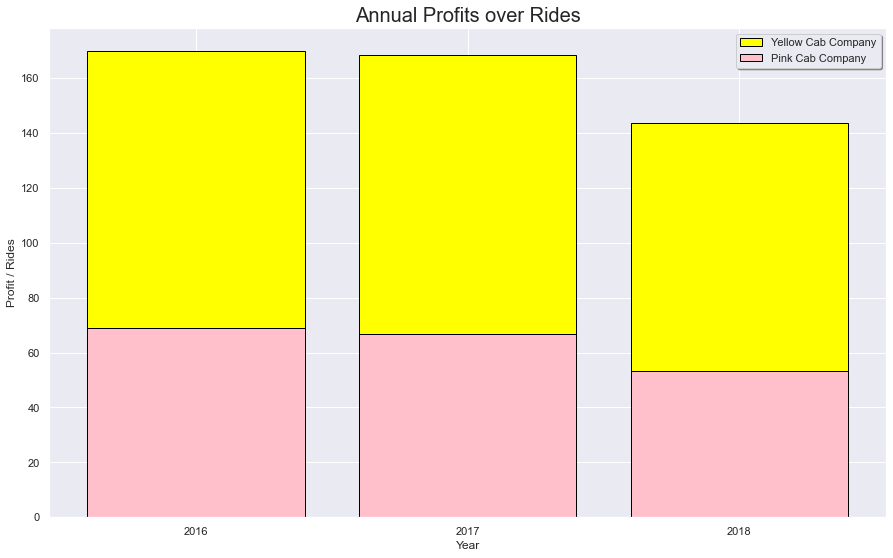

In [48]:
#The following visualizations show profit on each ride

plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.RidesProfit.resample('Y').sum()
x2= ppy.RidesProfit.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='RidesProfit', data = ypy,color = 'yellow',edgecolor = 'black',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='RidesProfit', data = ppy, color = 'pink',edgecolor = 'black',label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)


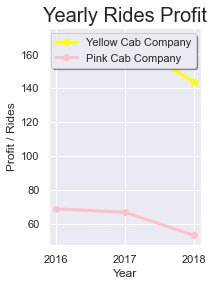

In [49]:
plt.subplot(1,2,1)
x1= ypy.RidesProfit.resample('Y').sum()
x2= ppy.RidesProfit.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'RidesProfit', data = ypy,color = 'yellow',label='Yellow Cab Company',linewidth=3, marker = 'o')
plt.plot(x2.index.strftime('%Y'),'RidesProfit', data = ppy, color = 'pink',label='Pink Cab Company',linewidth=3, marker='o')
plt.xticks(rotation=0)
plt.title('Yearly Rides Profit',fontsize=20)
plt.ylabel('Profit / Rides')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

Text(0.5, 8.95999999999998, 'Year')

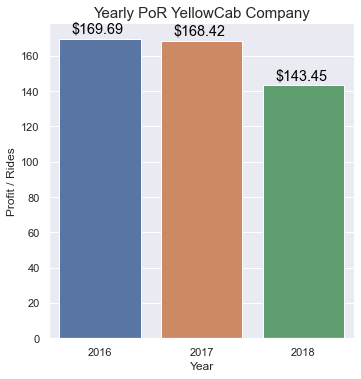

In [50]:
g=sns.catplot(ypy.index,'RidesProfit',data=ypy,kind='bar')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
yRange = ['2016','2017','2018']
m = range(len(yRange))
plt.xticks(m, yRange, rotation =0)

plt.title('Yearly PoR YellowCab Company',fontsize=15)
plt.ylabel('Profit / Rides')

plt.xlabel('Year')

Text(0.5, 8.95999999999998, 'Year')

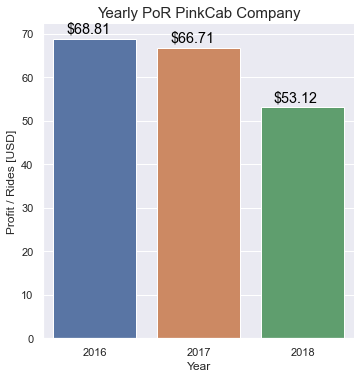

In [51]:
g=sns.catplot(ppy.index,'RidesProfit',data=ppy,kind='bar')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
yRange = ['2016','2017','2018']
m = range(len(yRange))
plt.xticks(m, yRange, rotation =0)
plt.title('Yearly PoR PinkCab Company',fontsize=15)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')

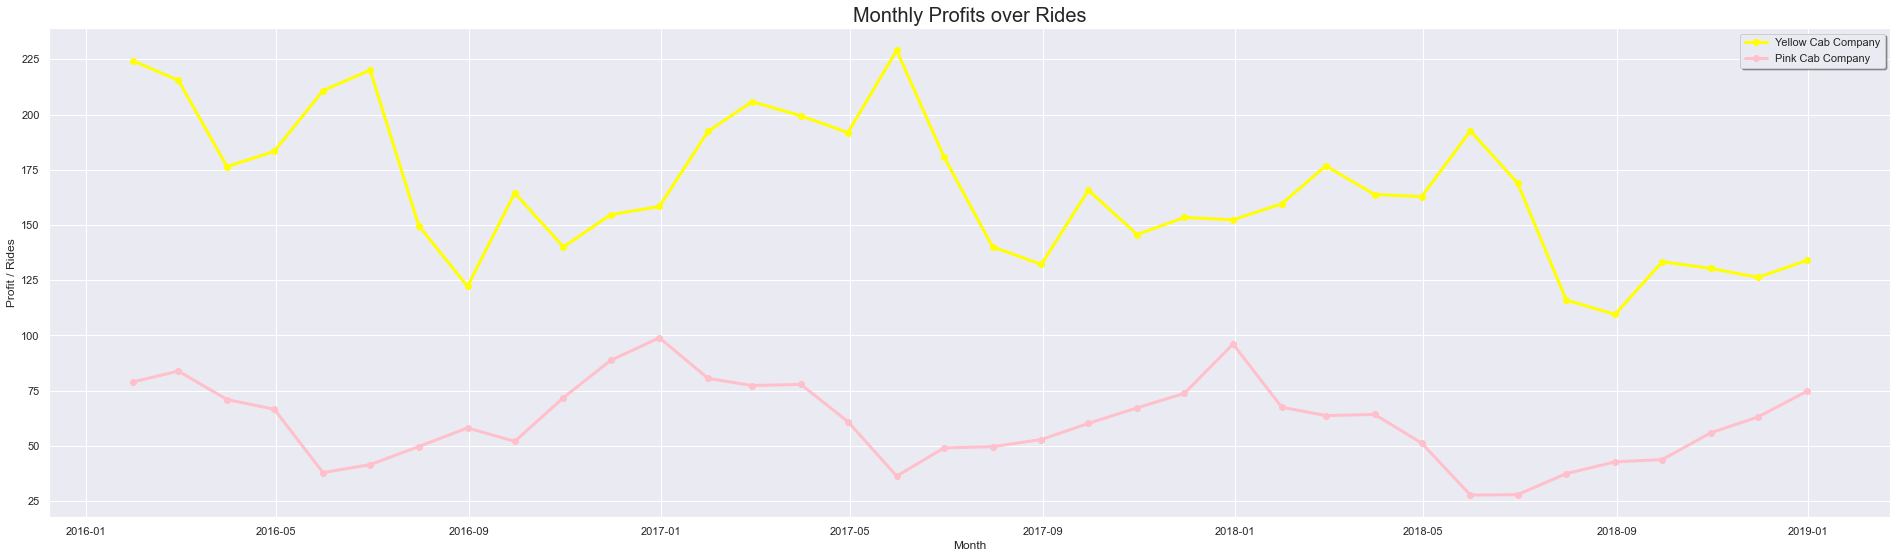

In [52]:
#Analysis of Ride Profits by Month

plt.figure(figsize=(33,9))

x1= ypm.RidesProfit.resample('m').sum()
x2= ppm.RidesProfit.resample('m').sum()
plt.plot(x1.index,'RidesProfit', data = ypm,color = 'yellow', linewidth = 3,label='Yellow Cab Company', marker='o')
plt.plot(x2.index,'RidesProfit', data = ppm, color = 'pink',linewidth = 3,label='Pink Cab Company', marker='o')
plt.xticks(rotation=0)
plt.title('Monthly Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)

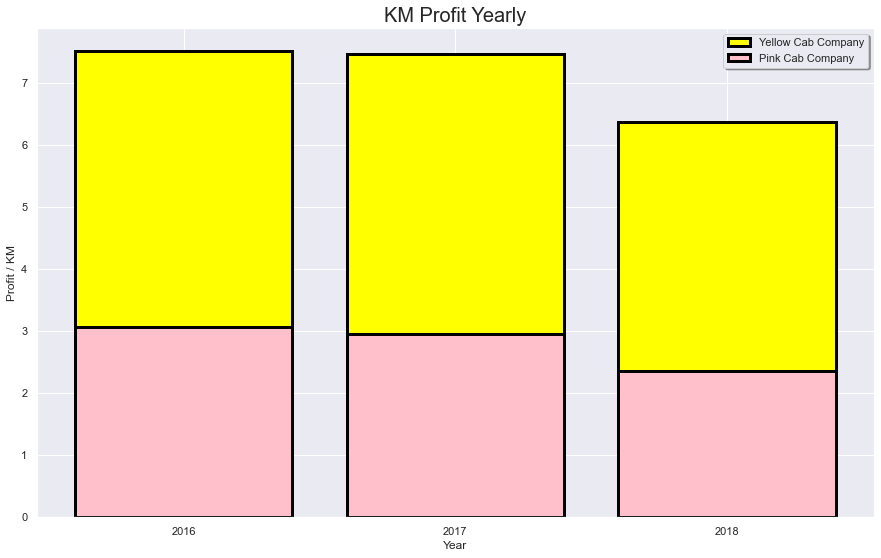

In [53]:
#KM Yearly Profits

plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.KMProfit.resample('Y').sum()
x2= ppy.KMProfit.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='KMProfit', data = ypy,color = 'yellow',edgecolor = 'black',label='Yellow Cab Company',linewidth=3)
plt.bar(x= x2.index.strftime('%Y'), height='KMProfit', data = ppy, color = 'pink',edgecolor = 'black',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('KM Profit Yearly',fontsize=20)
plt.ylabel('Profit / KM')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)


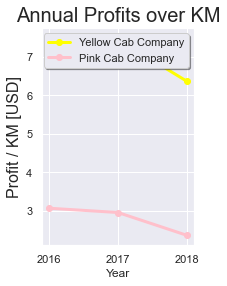

In [54]:
plt.subplot(1,2,1)
x1= ypy.KMProfit.resample('Y').sum()
x2= ppy.KMProfit.resample('Y').sum()
plt.ylabel('Profit / KM [USD]', fontsize=16)
plt.plot(x1.index.strftime('%Y'),'KMProfit', data = ypy,color = 'yellow',label='Yellow Cab Company',linewidth=3,marker='o')
plt.plot(x2.index.strftime('%Y'),'KMProfit', data = ppy, color = 'pink',label='Pink Cab Company',linewidth=3,marker='o')
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

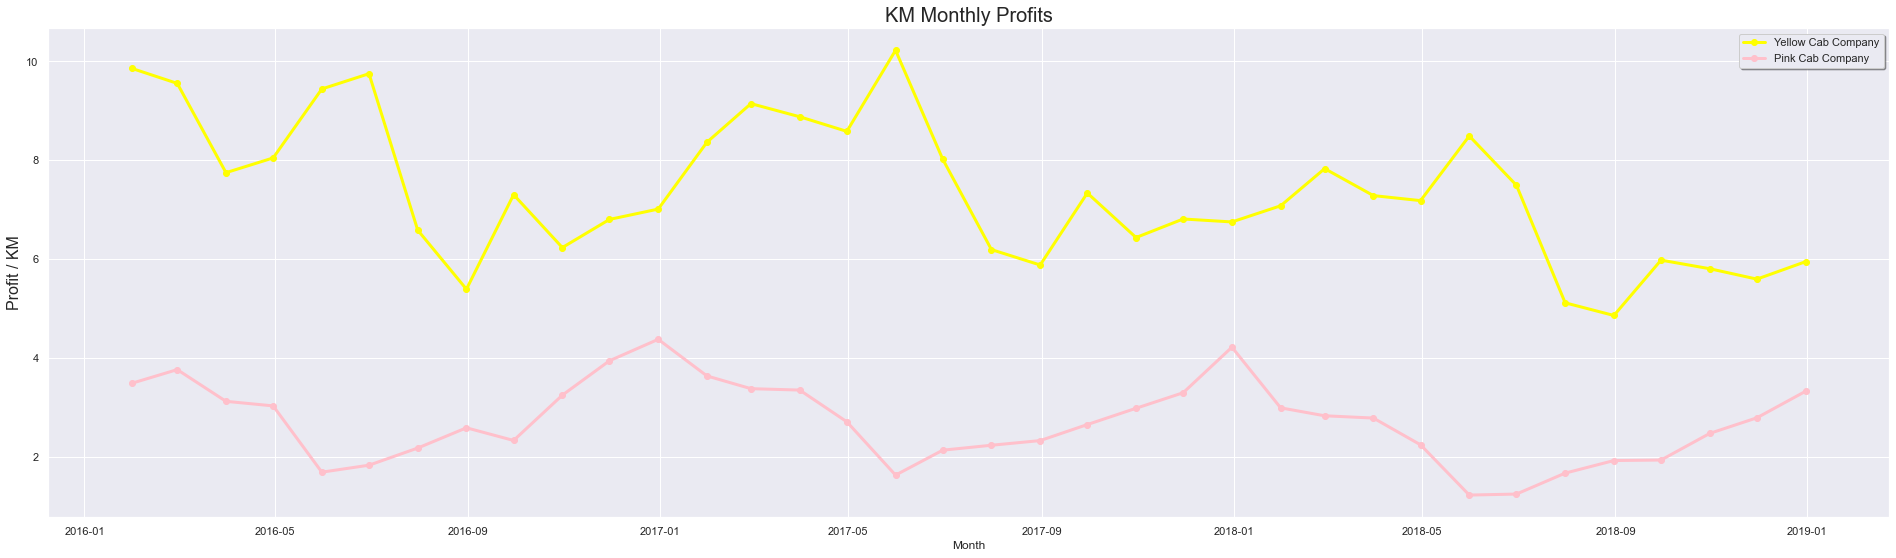

In [55]:
#KM Monthly Profits

plt.figure(figsize=(33,9))

x1= ypm.KMProfit.resample('m').sum()
x2= ppm.KMProfit.resample('m').sum()
plt.ylabel('Profit / KM', fontsize=16)
plt.plot(x1.index,'KMProfit', data = ypm,color = 'yellow',label='Yellow Cab Company',linewidth=3, marker='o')
plt.plot(x2.index,'KMProfit', data = ppm, color = 'pink',label='Pink Cab Company',linewidth=3,marker='o')
plt.xticks(rotation=0)
plt.title('KM Monthly Profits',fontsize=20)
plt.ylabel('Profit / KM')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)

Text(0.5, 1.0, 'Profits of Yellow Cab Company in City')

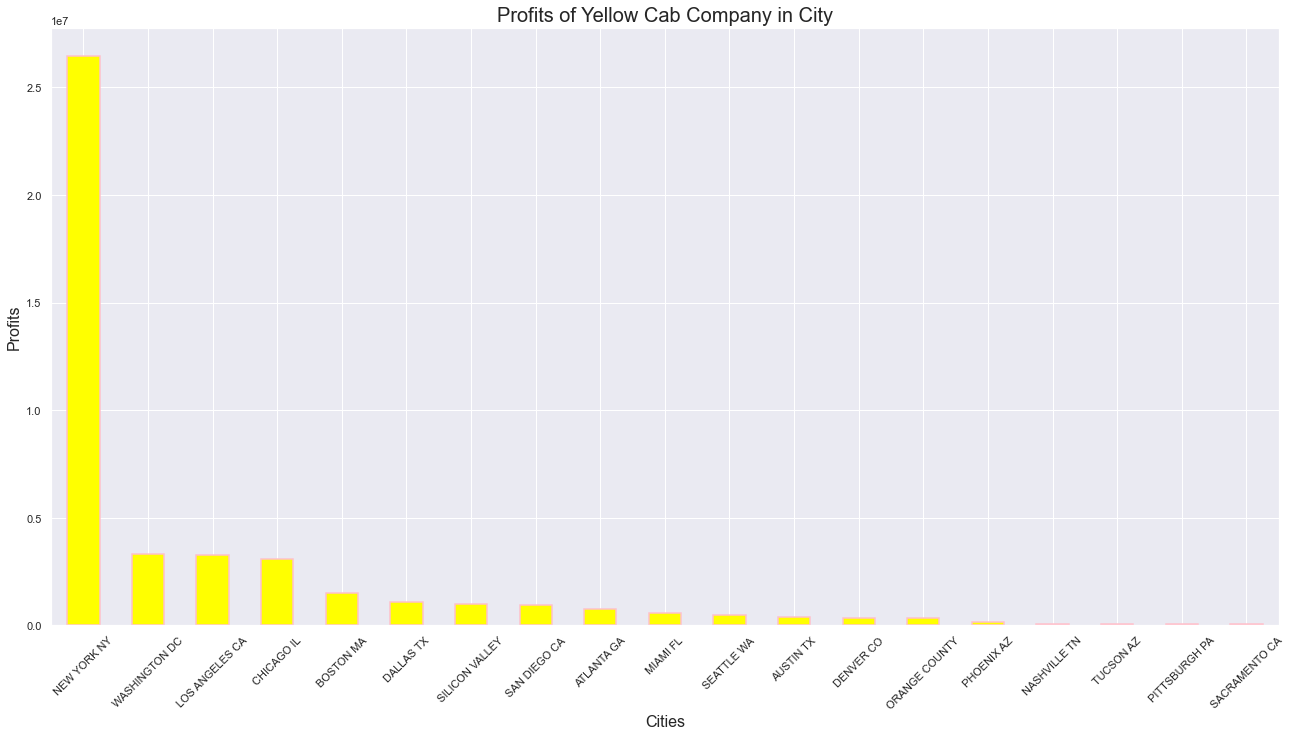

In [56]:
#City Profits On Average of Yellow Cab

ppc= yellowCab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'yellow',edgecolor='pink',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Profits of Yellow Cab Company in City',fontsize=20)

Text(0.5, 1.0, 'Profits of Pink Cab Company in City')

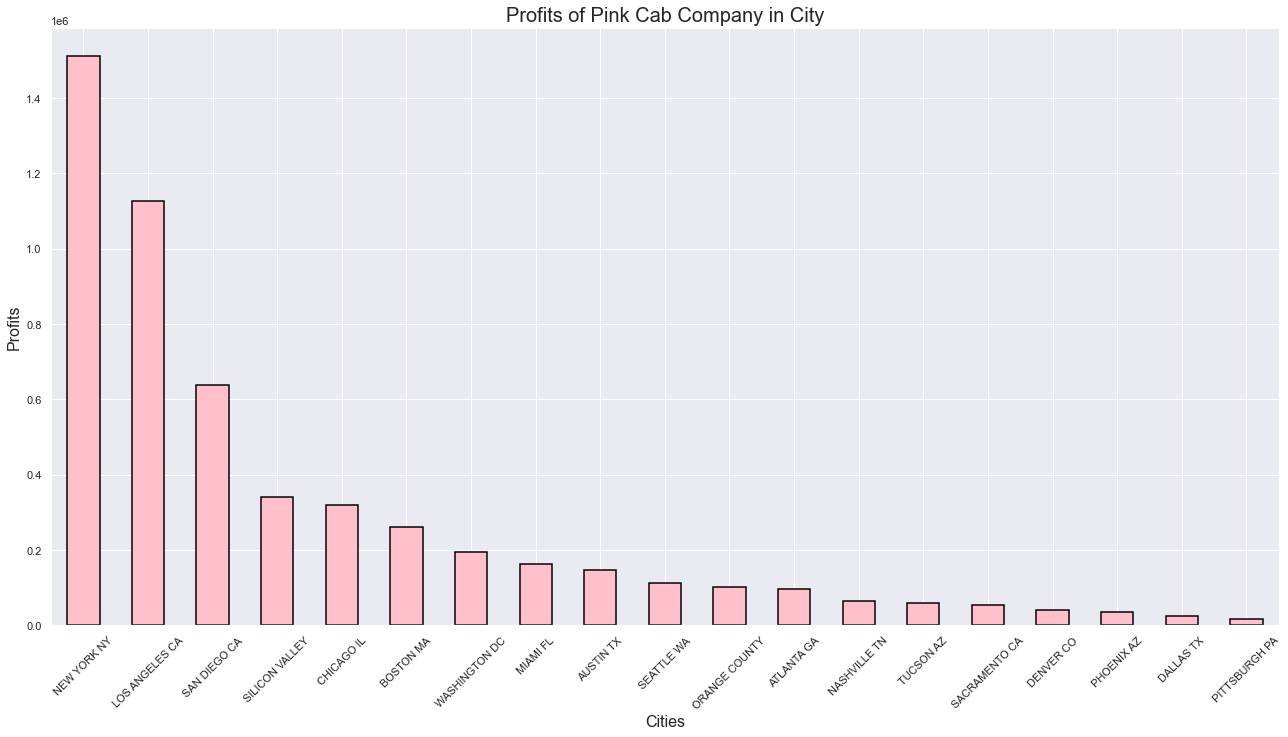

In [57]:
# City Profits On Average of Pink Cab

ppc= pinkCab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Profits of Pink Cab Company in City',fontsize=20)

In [58]:
h=mainData.groupby(['Company','City']).Profit.sum().to_frame('City Profits')
h=h.reset_index(level='City', col_level=1)
h=h.reset_index(level='Company', col_level=1)
h = h.sort_values(by='City Profits', ascending= False )

In [59]:
h=h.drop([28,9],axis=0)
h.head()

,Company,City,City Profits
37,Yellow Cab,WASHINGTON DC,3.299104e+06
25,Yellow Cab,LOS ANGELES CA,3.285977e+06
22,Yellow Cab,CHICAGO IL,3.068591e+06
21,Yellow Cab,BOSTON MA,1.506718e+06
6,Pink Cab,LOS ANGELES CA,1.125732e+06


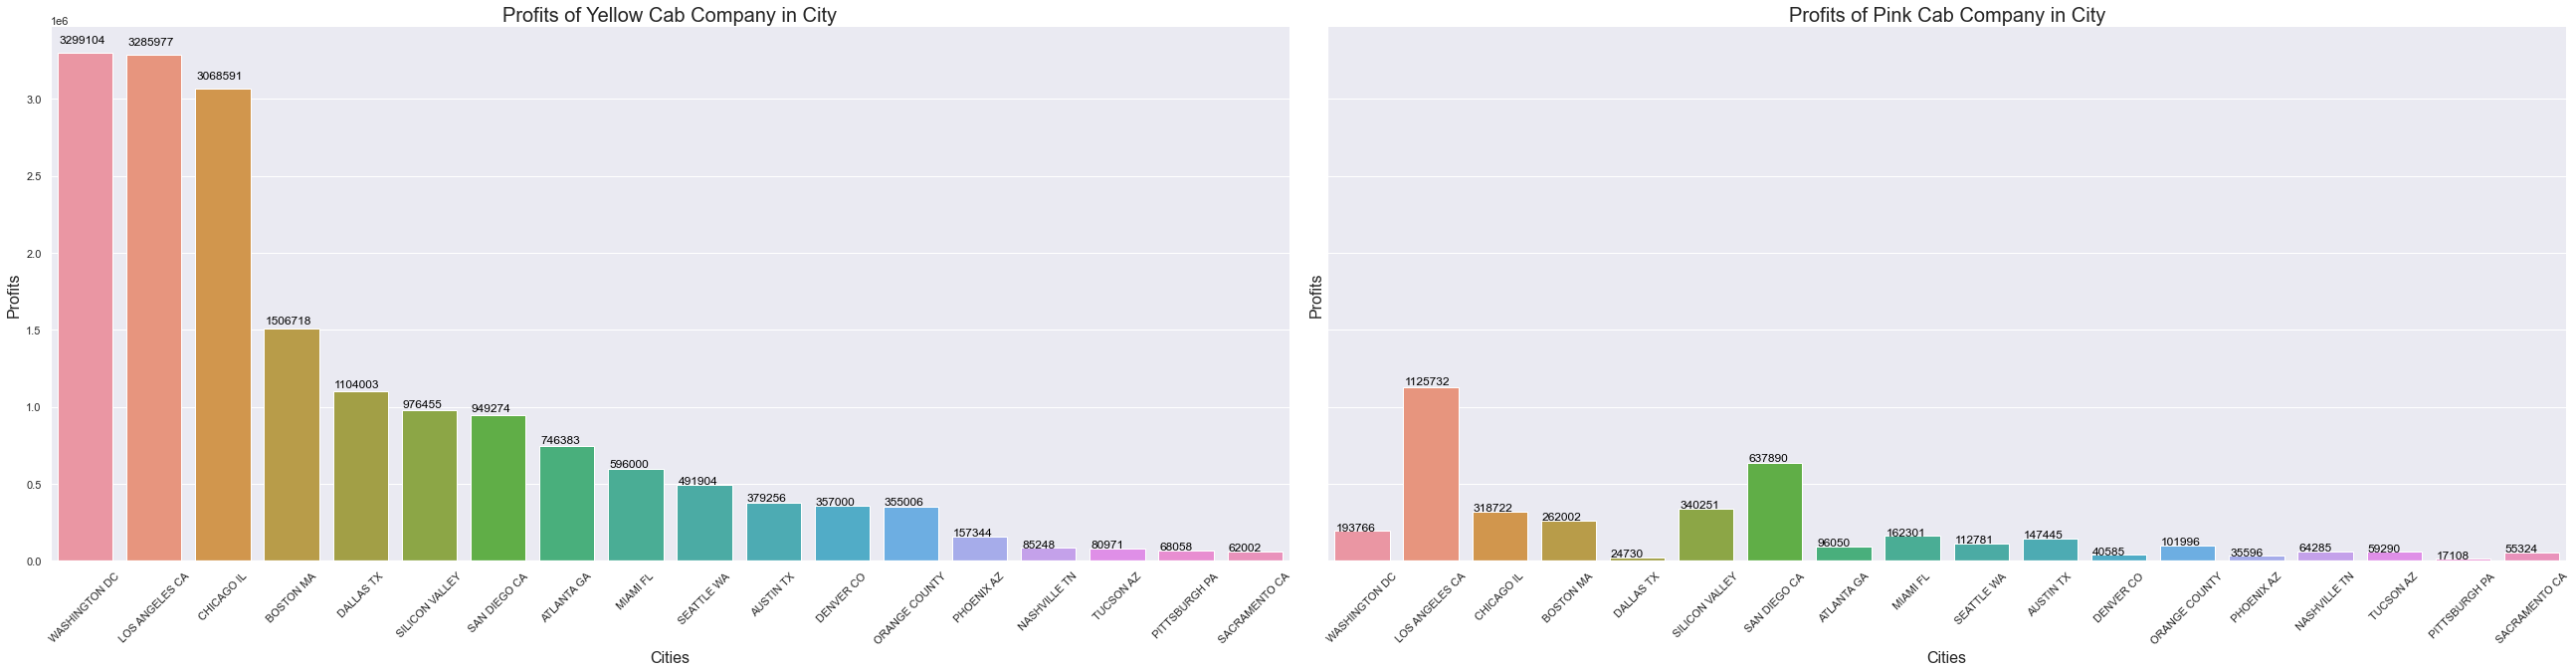

In [60]:
g=sns.catplot('City','City Profits',data=h,kind='bar',col='Company', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Profits of Yellow Cab Company in City',fontsize=20)
plt.xticks(rotation=45)

ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Profits of Pink Cab Company in City',fontsize=20)
plt.xticks(rotation=45)
plt.show()

#### City Profitable Rides 

In [61]:
#Percentage Analysis of most profitable Rides in City

yellowNP=yellowCab[(yellowCab['Profit']<0)]
yellowNP= yellowNP.City.value_counts()
yellowNP=pd.DataFrame(yellowNP)
yellowNP.columns=['q']

pinkNP=pinkCab[(pinkCab['Profit']<0)]
pinkNP= pinkNP.City.value_counts()
pinkNP=pd.DataFrame(pinkNP)
pinkNP.columns=['q']

In [62]:
yellowNP['Q']= yellowCab.City.value_counts() - yellowNP['q']
yellowNP['per']= ((1- (yellowNP['q'] / (yellowNP['q']+yellowNP['Q'])))*100)
yellowNP= yellowNP[['Q','q','per']]
yellowNP['Q']= yellowNP['Q'].astype(int)
yellowNP = yellowNP.sort_values(by='per', ascending= False )
yellowNP.head(30)
yellowNP.shape

(17, 3)

In [63]:
pinkNP['Q']= pinkCab.City.value_counts() - pinkNP['q']
pinkNP['per']= ((1- (pinkNP['q'] / (pinkNP['q']+pinkNP['Q'])))*100)
pinkNP= pinkNP[['Q','q','per']]
pinkNP['Q']= pinkNP['Q'].astype(int)
pinkNP = pinkNP.sort_values(by='per', ascending= False )
pinkNP.head(30)
pinkNP.shape

(19, 3)

Text(0.5, 0, 'Cities')

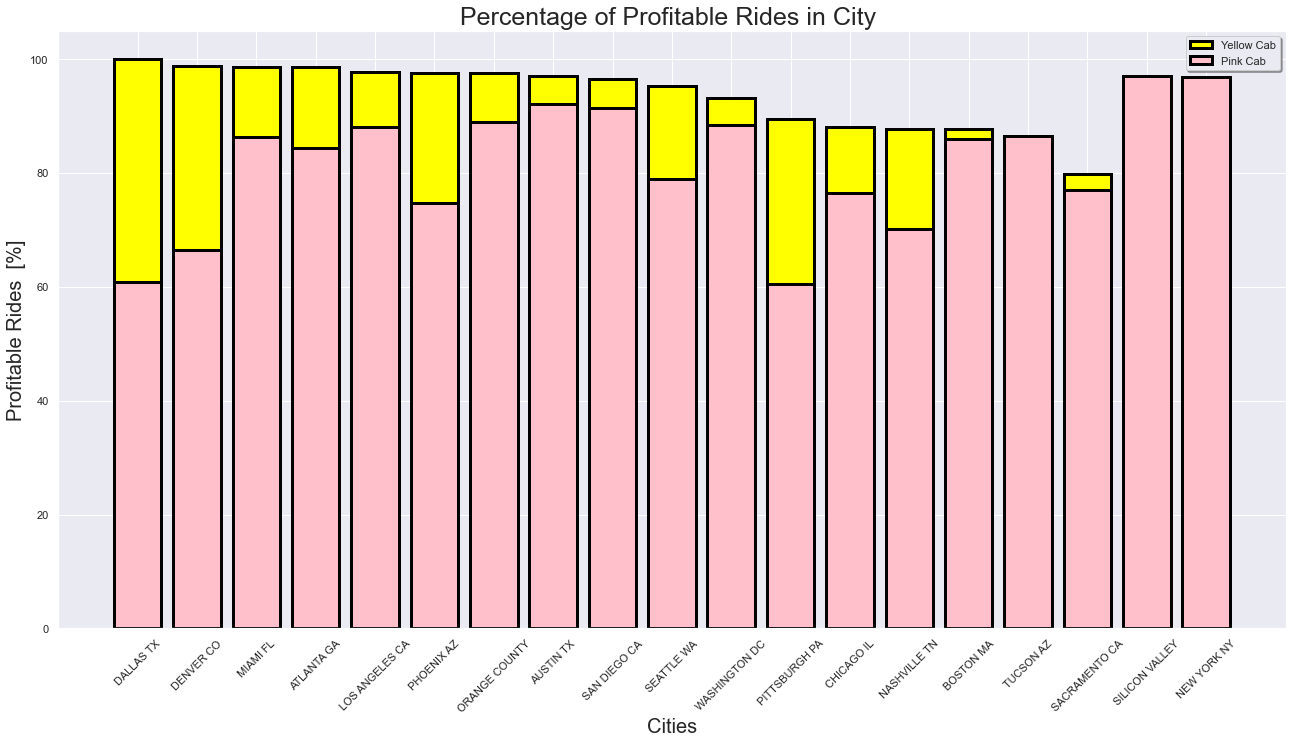

In [64]:
plt.figure(figsize=(22,11))
plt.bar(x= yellowNP.index, height='per', data = yellowNP,edgecolor = 'black',color = 'yellow',linewidth=3,label='Yellow Cab',)
plt.bar(x= pinkNP.index, height='per', data = pinkNP,edgecolor = 'black',color = 'pink',linewidth=3,label='Pink Cab',)
plt.xticks(rotation=45)
plt.ylabel('Profitable Rides  [%]', fontsize=20)
plt.title('Percentage of Profitable Rides in City ', fontsize = 25)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=20)

In [65]:
pinkNP=pinkNP.reset_index()
yellowNP=yellowNP.reset_index()

In [66]:
pinkNP.columns=['City','Q','q','per']
yellowNP.columns=['City','Q','q','per']
pinkNP.head()

,City,Q,q,per
0,SILICON VALLEY,3680,117,96.918620
1,NEW YORK NY,13514,453,96.756641
2,AUSTIN TX,1719,149,92.023555
3,SAN DIEGO CA,9750,922,91.360570
4,ORANGE COUNTY,1346,167,88.962327


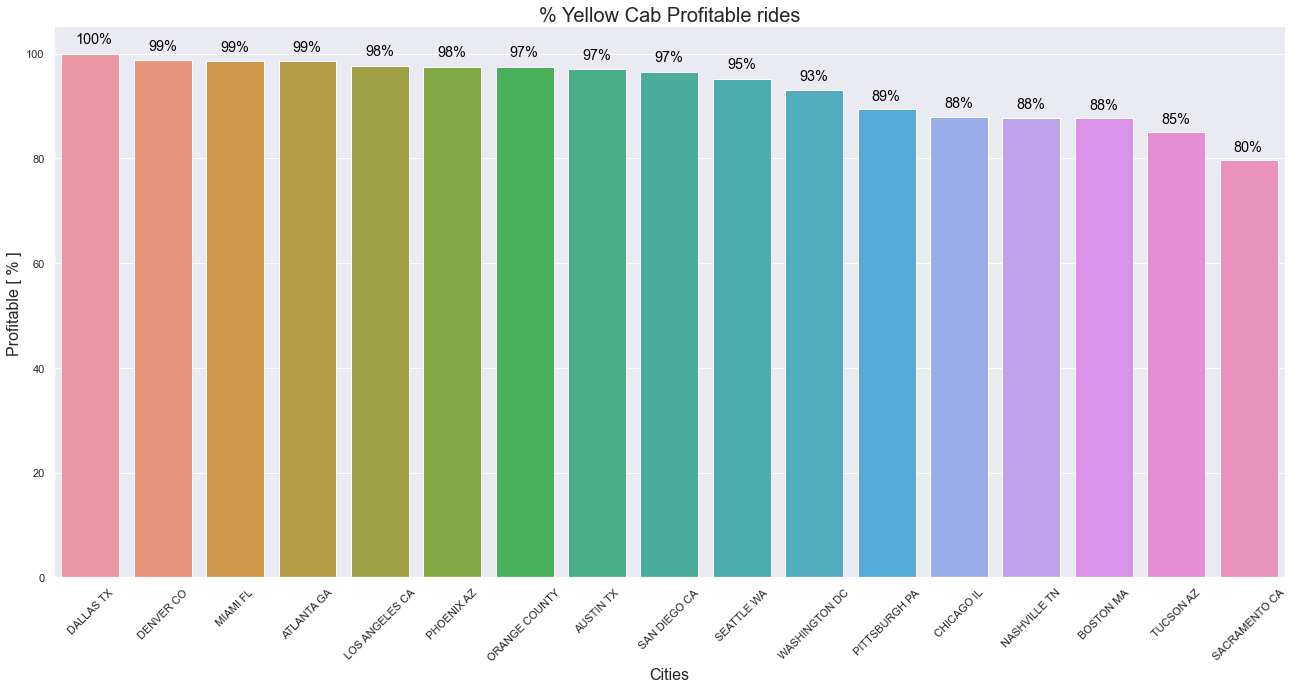

In [67]:
g=sns.catplot('City','per',data=yellowNP,kind='bar', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('% Yellow Cab Profitable rides',fontsize=20)
plt.xticks(rotation=45)

plt.show()

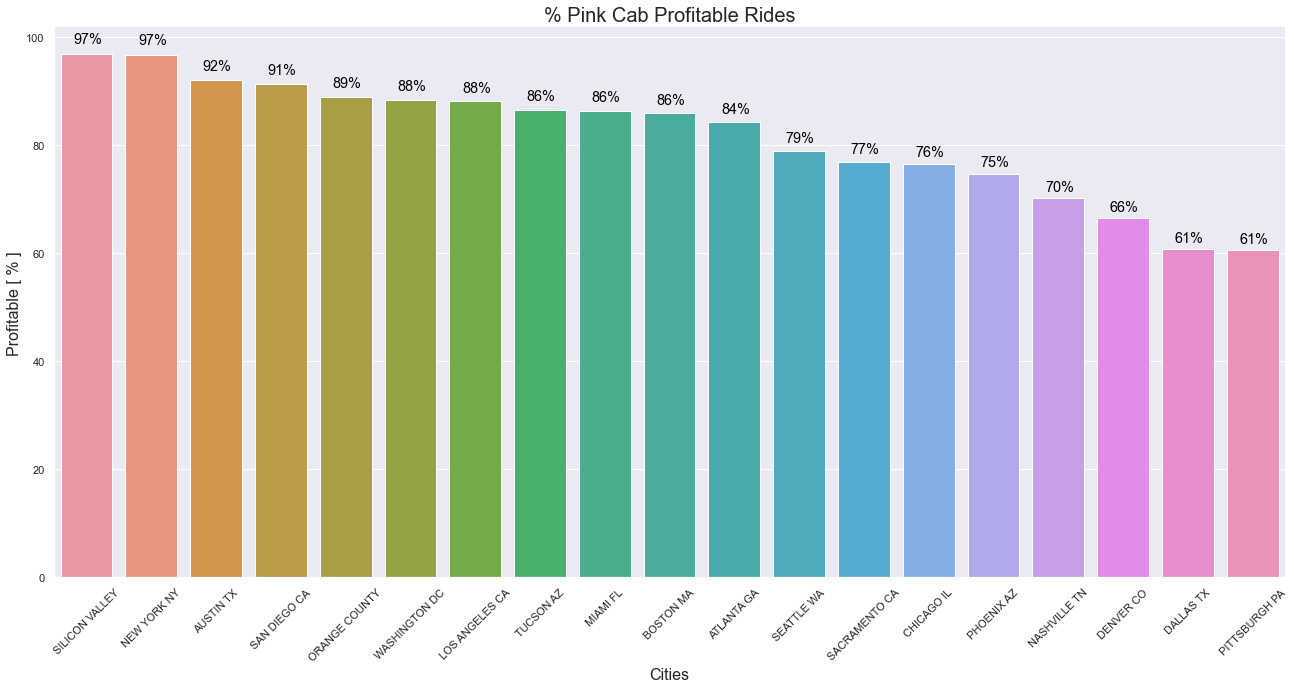

In [68]:
g=sns.catplot('City','per',data=pinkNP,kind='bar', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('% Pink Cab Profitable Rides',fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Analysis of Demand for each Cab Company

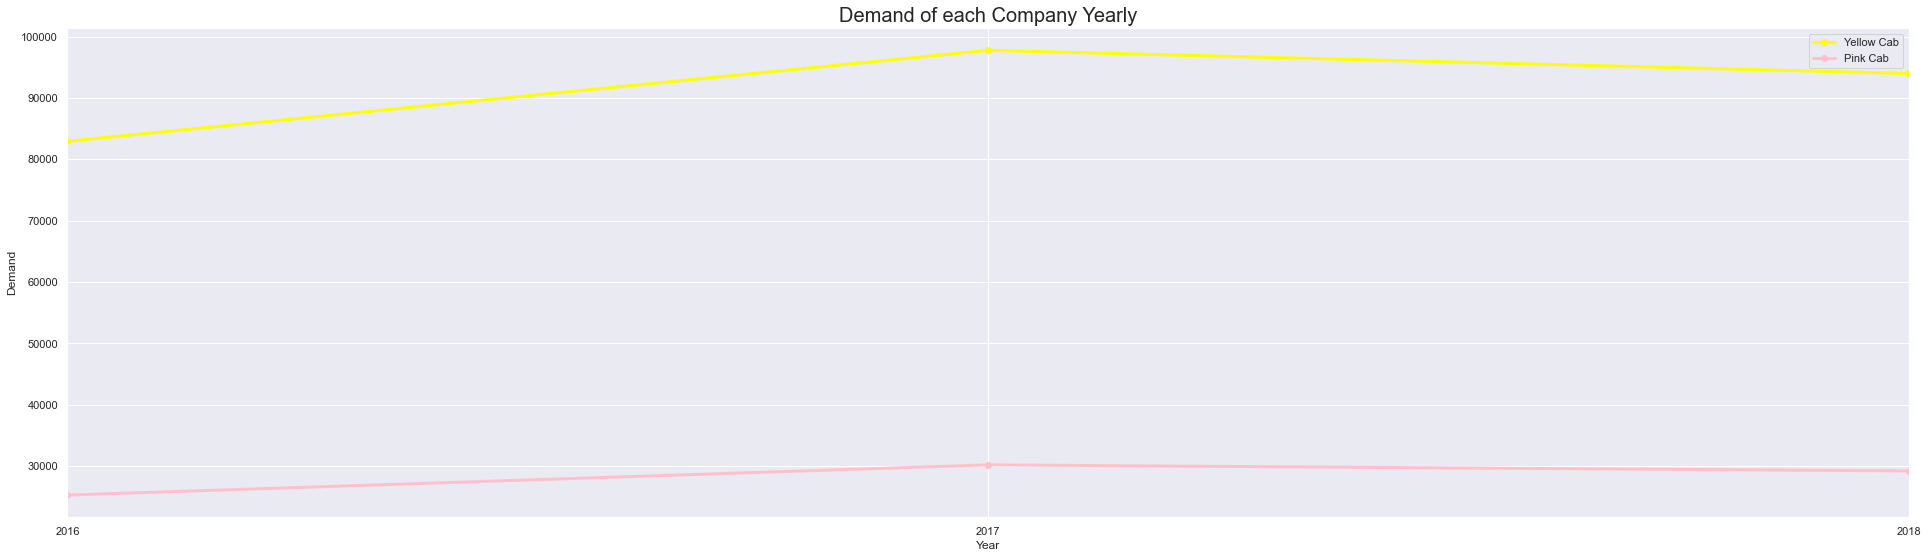

In [69]:
#Yearly Demand Visualization

plt.figure(figsize=(33,9))

yellowCab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'yellow',linewidth =3,marker='o')
pinkCab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'pink',linewidth =3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Demand of each Company Yearly',fontsize=20)
plt.ylabel('Demand')
plt.xlabel('Year')

plt.show()
           

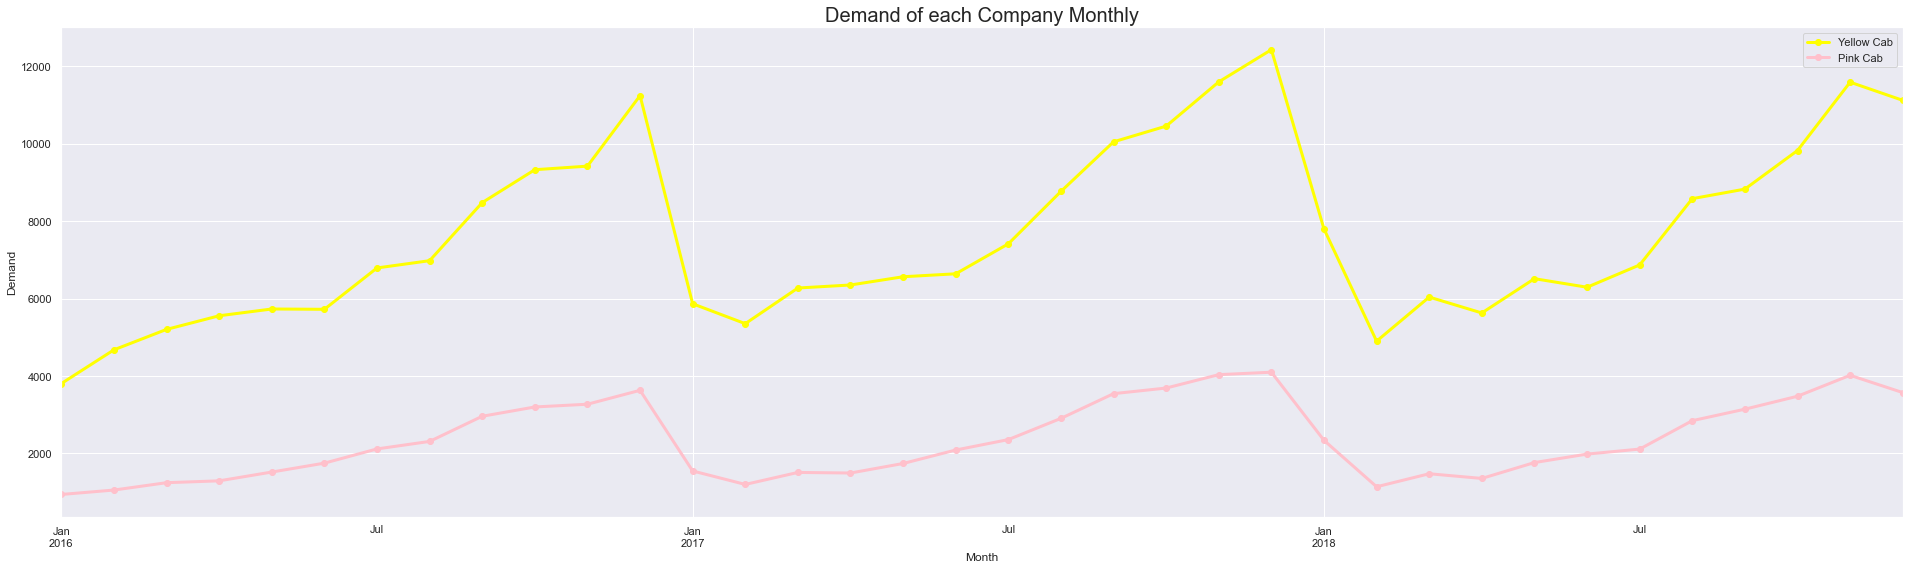

In [70]:
#Monthly Demand Visualization

plt.figure(figsize=(33,9))

yellowCab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'yellow',label='Yellow Cab Company',linewidth=3, marker='o')
pinkCab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'pink',label='Pink Cab Company',linewidth=3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Demand of each Company Monthly',fontsize=20)
plt.ylabel('Demand')
plt.xlabel('Month')
plt.show()

In [71]:
#Getting Average of monthly Demand

dpm=mainData.groupby(['Company','Month of Travel'])['Transaction ID'].agg(['count'])
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)
dpm = dpm.sort_values(by='count', ascending= False )

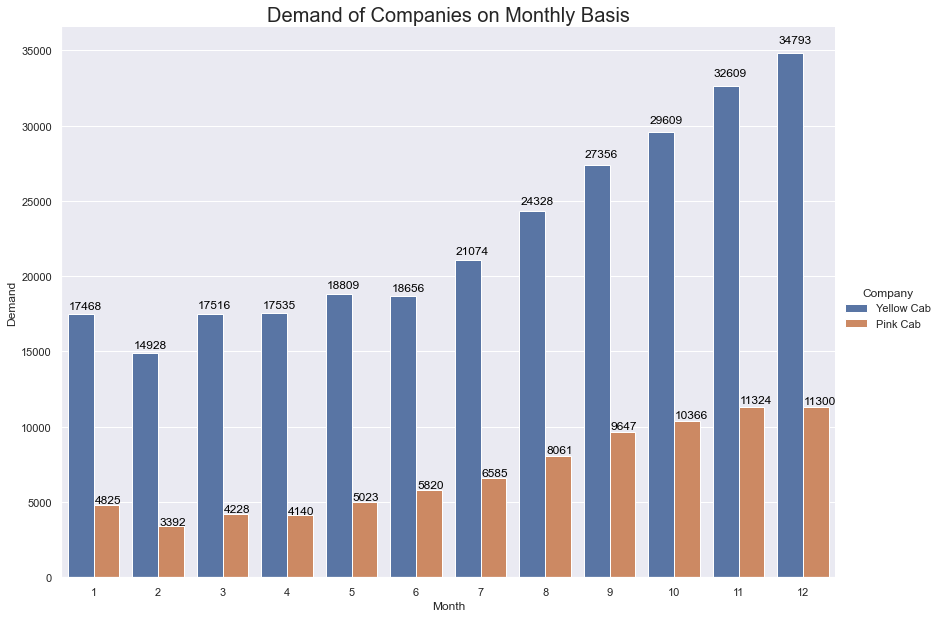

In [72]:
#Visualization to show Average of each Company on Monthly Basis

g=sns.catplot('Month of Travel','count',data=dpm,kind='bar',hue='Company', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Demand of Companies on Monthly Basis',fontsize=20)
plt.ylabel('Demand')
plt.xlabel('Month')
plt.show()

In [73]:
#Analysis of Demand based on Age

ageG1=mainData[(mainData['Age']>18) & (mainData['Age']<25)]
ageG2=mainData[(mainData['Age']>26) & (mainData['Age']<40)]
ageG3=mainData[(mainData['Age']>41) & (mainData['Age']<60)]
ageG4=mainData[(mainData['Age']>60)]

In [74]:
ageG11= ageG1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
ageG11.columns=['Total Customers']
ageG11=ageG11.reset_index(level='Year of Travel', col_level=1)
ageG11=ageG11.reset_index(level='Company', col_level=1)
ageG11['Class']= '18-25'

In [75]:
ageG22= ageG2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
ageG22.columns=['Total Customers']
ageG22=ageG22.reset_index(level='Year of Travel', col_level=1)
ageG22=ageG22.reset_index(level='Company', col_level=1)
ageG22['Class']= '26-40'

In [76]:
ageG33= ageG3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
ageG33.columns=['Total Customers']
ageG33=ageG33.reset_index(level='Year of Travel', col_level=1)
ageG33=ageG33.reset_index(level='Company', col_level=1)
ageG33['Class']= '40-60'

In [77]:
ageG44= ageG4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
ageG44.columns=['Total Customers']
ageG44=ageG44.reset_index(level='Year of Travel', col_level=1)
ageG44=ageG44.reset_index(level='Company', col_level=1)
ageG44['Class']= '60+'

In [78]:
ageGroup=ageG11
ageGroup=pd.concat([ageGroup,ageG22,ageG33,ageG44])
ageGroup['Total Customers']=ageGroup['Total Customers'].astype(int)
ageGroup.head(5)

,Company,Year of Travel,Total Customers,Class
0,Pink Cab,2016,4885,18-25
1,Pink Cab,2017,5985,18-25
2,Pink Cab,2018,5760,18-25
3,Yellow Cab,2016,16196,18-25
4,Yellow Cab,2017,19174,18-25


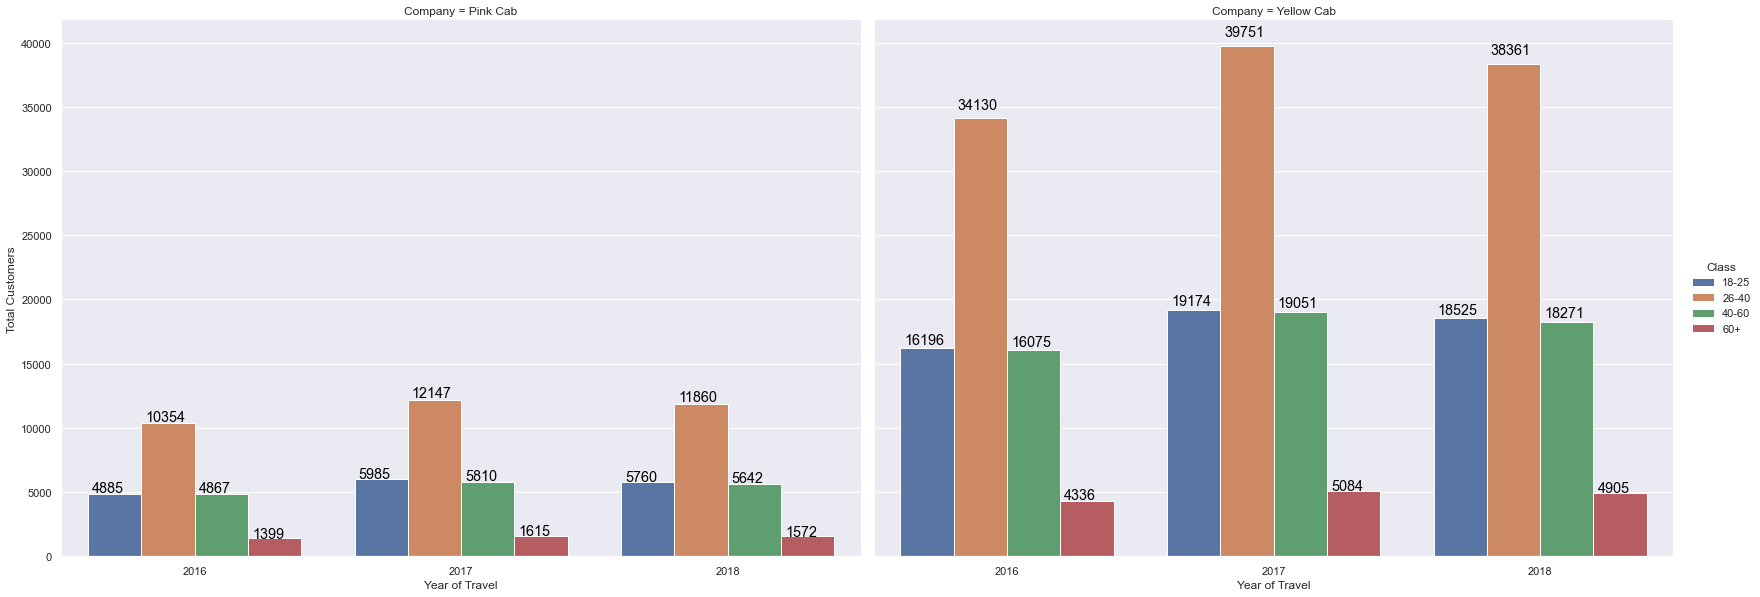

In [79]:
g=sns.catplot('Year of Travel','Total Customers',data=ageGroup,col= 'Company',kind='bar',hue='Class', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

In [80]:
a=ageGroup.groupby(['Company', 'Year of Travel'])['Total Customers'].sum().to_frame('Total')

a.head(6)

Total
Company    Year of Travel       
Pink Cab   2016            21505
           2017            25557
           2018            24834
Yellow Cab 2016            70737
           2017            83060
           2018            80062

### Analysis of Customers

In [81]:
years=[2016,2017,2018]
yellowCustYr=[]
pinkCustYr=[]

In [82]:
for year in years:
  yellowYr=mainData[(mainData['Year of Travel']==year) & (mainData['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellowYr.reset_index(inplace=True)
  yellowYr[yellowYr['count']>=10]
  yellowCustYr.append(len(yellowYr))
  pinkYr=mainData[(mainData['Year of Travel']==year) & (mainData['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pinkYr.reset_index(inplace=True)
  pinkYr[pinkYr['count']>=10]
  pinkCustYr.append(len(pinkYr))

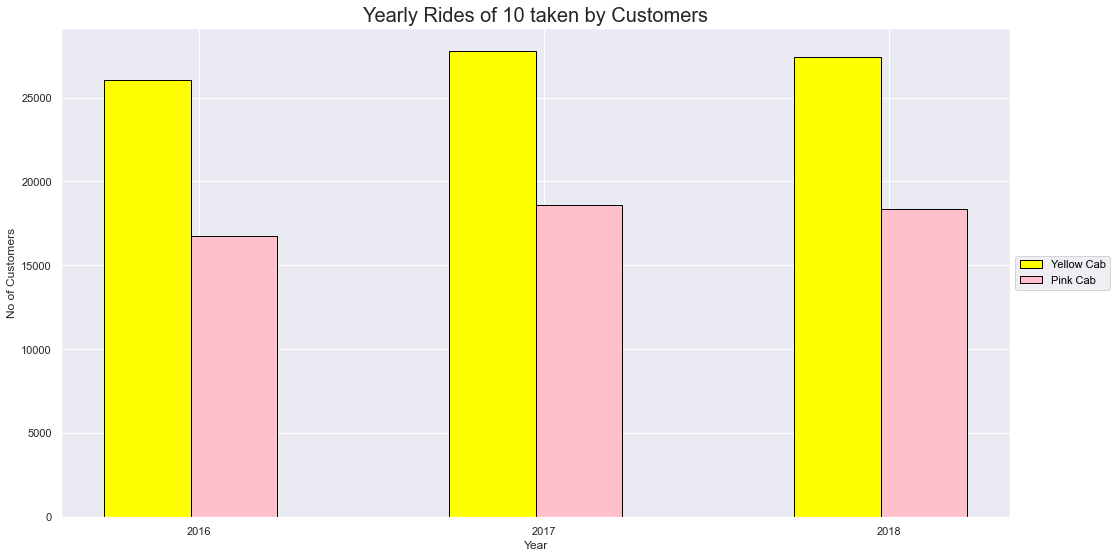

In [83]:
plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,yellowCustYr,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,pinkCustYr,color='pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Yearly Rides of 10 taken by Customers',fontsize=20)
plt.ylabel('No of Customers')
plt.xlabel('Year')
plt.show()

In [84]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
yellowCustM=[]
pinkCustM=[]

In [85]:
for month in months:
  yellowYr=mainData[(mainData['Month of Travel']==month) & (mainData['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellowYr.reset_index(inplace=True)
  yellowYr[yellowYr['count']>=10]
  yellowCustM.append(len(yellowYr))
  pinkYr=mainData[(mainData['Month of Travel']==month) & (mainData['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pinkYr.reset_index(inplace=True)
  pinkYr[pinkYr['count']>=10]
  pinkCustM.append(len(pinkYr))

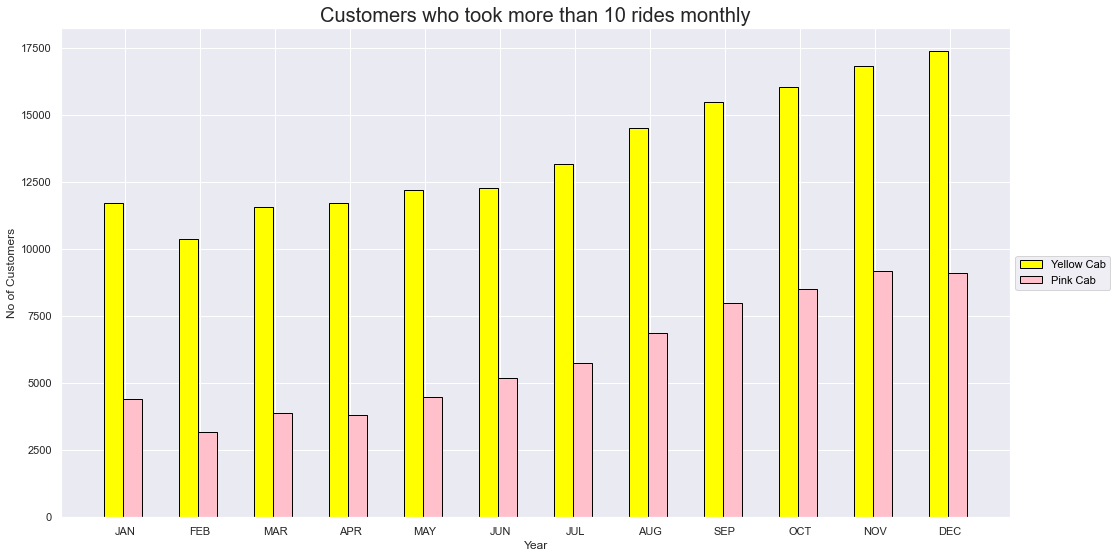

In [86]:
plt.figure(figsize=(17,9))
X = np.arange(12)
plt.bar(X+0.00,yellowCustM,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,pinkCustM,color='pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides monthly',fontsize=20)
plt.ylabel('No of Customers')
plt.xlabel('Year')
plt.show()

In [87]:
yellowCustM=pd.DataFrame(yellowCustM)
pinkCustM=pd.DataFrame(pinkCustM)

In [88]:
pinkCustM.columns=pinkCustM.columns=['Long Time Customers']
yellowCustM.columns=yellowCustM.columns=['Long Time Customers']

yellowCustM.head()

,Long Time Customers
0,11702
1,10362
2,11579
3,11705
4,12204


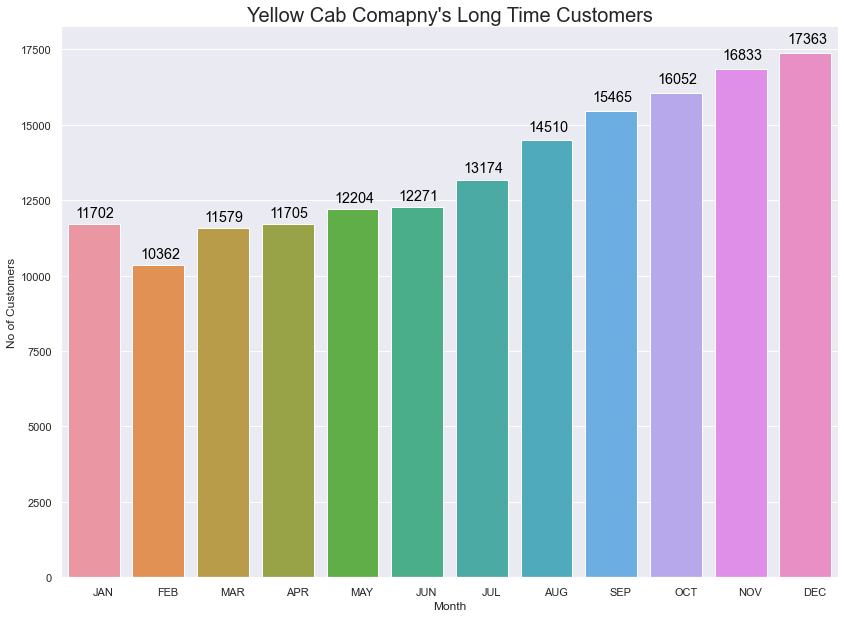

In [89]:
g=sns.catplot(yellowCustM.index,'Long Time Customers',data=yellowCustM,kind='bar', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title("Yellow Cab Comapny's Long Time Customers",fontsize=20)
plt.ylabel('No of Customers')
plt.xlabel('Month')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()

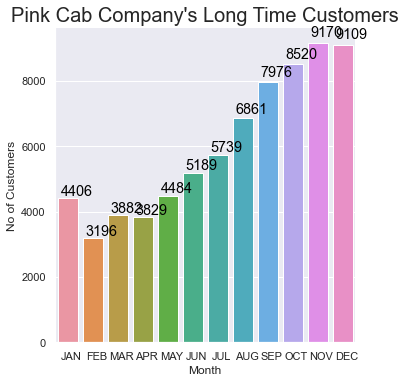

In [90]:
g=sns.catplot(pinkCustM.index,'Long Time Customers',data=pinkCustM,kind='bar')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title("Pink Cab Company's Long Time Customers",fontsize=20)
plt.ylabel('No of Customers')
plt.xlabel('Month')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.show()